# Ad-Hoc Analysis Finnmarksykehusene

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import numpy as np

In [8]:
finnmark_df = pd.read_excel('./funn-intervjuer-Finnmark.xlsx', skiprows=2, engine='openpyxl')

In [11]:
finnmark_df.head(5)

,Avdelingsområder,Kalenderplan,Roterende,Tillitsvalgt,Avdelingsleder,Enhetsleder,Ass Leder,Andre,Ansattes Ønsker,Budsjett,...,Annet.1,Erfaringsbasert,Fakta- og tallbasert,Kildesystem,Null,Lav.1,Medium.1,Høy.1,Viktig å få med,Fra intervjuobjekt eller intervjuere
0,Intensiv Hammerfest,1,0,1,0,0,0,1,1,0,...,0,1,0,NaN,0,0,0,1,NaN,NaN
1,Psykisk Helsevern Klinkk Alta,1,0,1,0,0,1,0,1,0,...,0,1,0,NaN,0,1,0,0,NaN,NaN
2,Intensiv Medisinsk Akuttmottak Kirkenes,0,0,0,0,0,0,0,0,0,...,0,0,0,NaN,0,0,0,0,NaN,NaN
3,Sengepost og Dialyse Alta,1,0,1,0,1,0,0,1,0,...,0,1,0,NaN,0,1,0,0,NaN,NaN
4,Yngre Legers Forbund Hammerfest,0,1,0,0,1,0,1,0,0,...,1,0,0,NaN,0,1,0,0,NaN,NaN


## Kalender vs Roterende

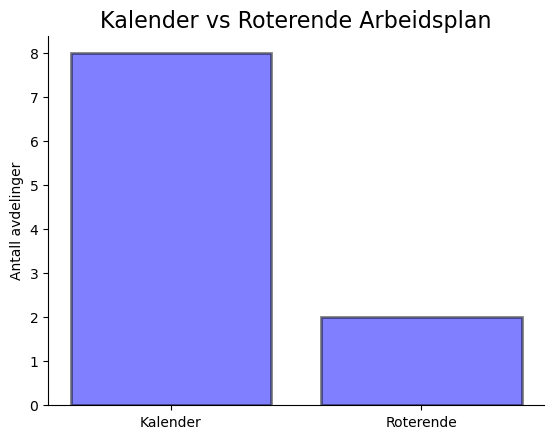

In [101]:
kalender = finnmark_df.Kalenderplan.sum()
roterende = finnmark_df.Roterende.sum()

color = (
    0.0, #red
    0.0, #green
    1.0, #blue
    0.0 #transparency
)
fig, ax = plt.subplots()
objects = (kalender,roterende)
plt.title('Kalender vs Roterende Arbeidsplan', fontsize = '16')
y_pos = np.arange(len(objects))
plt.bar(y_pos, [kalender,roterende], 
        align= 'center', alpha=0.5, 
        color=color, edgecolor = 'black', linewidth = 2)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.xticks(y_pos, objects)
ax.set_xticklabels(['Kalender', 'Roterende'])
plt.ylabel('Antall avdelinger')

plt.show()

## Utarbeidelse av Arbeidsplan

In [73]:
finnmark_df.columns

Index(['Avdelingsområder', 'Kalenderplan', 'Roterende', 'Tillitsvalgt',
       'Avdelingsleder', 'Enhetsleder', 'Ass Leder', 'Andre',
       'Ansattes Ønsker', 'Budsjett', 'Behov/Pasientaktivitet', 'Ingen', 'Lav',
       'Medium', 'Høy', '2-delt', '3-delt', '3-uker', '4-uker', 'Annet',
       '3dje hver helg', '4de hver helg', '1 hink', '2 hink', '3 hink',
       '8 timers', '12 timers', 'Annet.1', 'Erfaringsbasert',
       'Fakta- og tallbasert', 'Kildesystem', 'Null', 'Lav.1', 'Medium.1',
       'Høy.1', 'Viktig å få med', 'Fra intervjuobjekt eller intervjuere'],
      dtype='object')

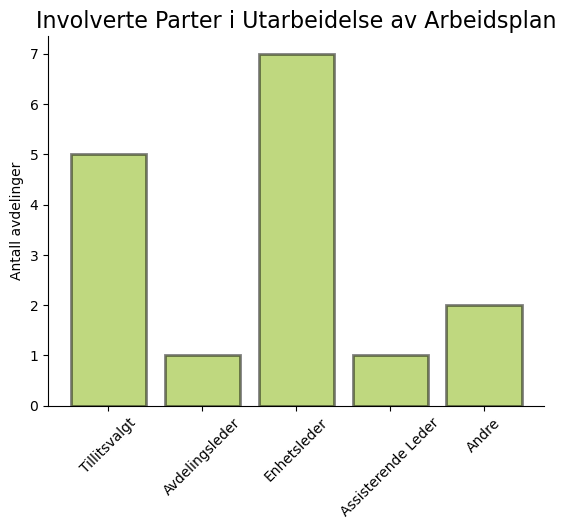

In [95]:
tillitsvalgt = finnmark_df.Tillitsvalgt.sum()
Avdelingsleder = finnmark_df.Avdelingsleder.sum()
Enhetsleder = finnmark_df.Enhetsleder.sum()
assisterende = finnmark_df['Ass Leder'].sum()
andre = finnmark_df.Andre.sum()

color = (
    0.5, #red
    0.7, #green
    0.0, #blue
    0.0 #transparency
)
fig, ax = plt.subplots()
objects = (tillitsvalgt, Avdelingsleder, Enhetsleder, assisterende, andre)
plt.title('Involverte Parter i Utarbeidelse av Arbeidsplan', fontsize = '16')
y_pos = np.arange(len(objects))
plt.bar(y_pos, list(objects), 
        align= 'center', alpha=0.5, 
        color=color, edgecolor = 'black', linewidth = 2)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.xticks(y_pos, objects, rotation = 45)
ax.set_xticklabels(['Tillitsvalgt', 'Avdelingsleder', 'Enhetsleder', 'Assisterende Leder', 'Andre'], )
plt.ylabel('Antall avdelinger')

plt.show()

## Prioritet i Arbeidsplanoppsett

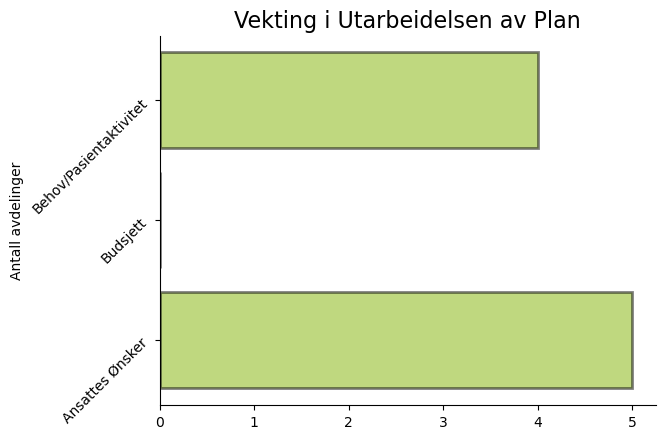

In [103]:
ønsker = finnmark_df['Ansattes Ønsker'].sum()
Budsjett = finnmark_df.Budsjett.sum()
Etterspørsel = finnmark_df['Behov/Pasientaktivitet'].sum()


color = (
    0.5, #red
    0.7, #green
    0.0, #blue
    0.0 #transparency
)
fig, ax = plt.subplots()
objects = (ønsker, Budsjett, Etterspørsel)
plt.title('Vekting i Utarbeidelsen av Plan', fontsize = '16')
y_pos = np.arange(len(objects))
plt.barh(y_pos, list(objects), 
        align= 'center', alpha=0.5, 
        color=color, edgecolor = 'black', linewidth = 2)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.yticks(y_pos, objects, rotation = 45)
ax.set_yticklabels(['Ansattes Ønsker', 'Budsjett', 'Behov/Pasientaktivitet'], )
plt.ylabel('Antall avdelinger')

plt.show()